In [181]:
import pandas as pd
import numpy as np
import my_pickle as mp
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

import my_resample as ms


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = mp.unjson_it('data_master')
print("Make sure we're not using ECT data")
print(df.timestamp.max())

Make sure we're not using ECT data
2017-10-02 01:35:58.644000


In [42]:
def drop_columns(df):
    col_to_drop = ['uid_sender','uid_receiver','mid_sender','mid_receiver',
                   'updated_sender','activeAt_sender',
                   'created_sender','available_sender','about_sender','birthday_sender', 'location_sender', 'work_sender',
                   'hometownCity_sender','hometownState_sender','hometownCountry_sender','college_sender','neighborhoods_sender',
                   'amenities_sender', 'hobbies_sender',
                   'updated_receiver','activeAt_receiver',
                   'created_receiver','available_receiver','about_receiver','birthday_receiver', 'location_receiver', 'work_receiver',
                   'hometownCity_receiver','hometownState_receiver','hometownCountry_receiver','college_receiver','neighborhoods_receiver',
                   'amenities_receiver', 'hobbies_receiver','timestamp']
                   
    return df.drop(col_to_drop, axis=1) 

X_df = drop_columns(df).fillna(df.mean(axis=0))
X_df.head()

,I_count_receiver,I_count_sender,I_ratio_receiver,I_ratio_sender,age_dif,age_receiver,age_sender,amenities_overlap,convo_length,distance,...,sentence_ratio_receiver,sentence_ratio_sender,smokingOk_receiver,smokingOk_sender,term_receiver,term_sender,type_receiver,type_sender,urgency_receiver,urgency_sender
02sjTzcsaO02omVxM8Xm,0,0.0,0.011298,0.000000,3.0,25,22.0,0,1,37.806874,...,0.016371,0.148148,1,1.0,6.0,11.450264,1.000000,0.862843,1.723056e+09,-6.768931e+09
07Aj9wLBPC013LzOrVju,0,2.0,0.011298,0.006803,6.0,24,30.0,1,1,5.482670,...,0.016371,0.030612,0,1.0,2.0,4.000000,1.000000,0.862843,2.679062e+09,2.624028e+08
07lVtClAEQ01iDVeaXl1,6,0.0,0.014493,0.012595,5.0,20,25.0,3,1,1.207884,...,0.014493,0.018102,1,1.0,13.0,12.000000,0.909091,1.000000,-4.618784e+08,3.196406e+08
0AFU6guKDt01iDVeaXl1,1,0.0,0.004902,0.012595,3.0,22,25.0,2,1,41.182387,...,0.014706,0.018102,0,1.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,3.196002e+08
0AFU6guKDt01mfWG4vUm,0,1.0,0.011298,0.004902,4.0,26,22.0,1,1,46.212738,...,0.016371,0.014706,0,0.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,-6.768931e+09


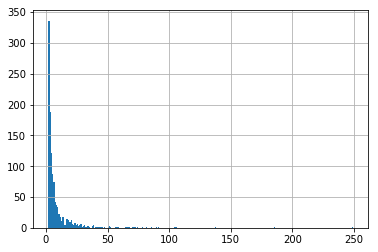

In [49]:
X_df.convo_length.hist(bins=range(2,250))
plt.show()

# WRANGLE DATA

In [159]:
def wrangle_data(resamp):
    # GET DATA
    y = X_df.convo_length
    X = X_df.drop(['convo_length'], axis=1)

    # TRAIN TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

    # RESAMPLE
    X_train, y_train = ms.oversample(X_train, y_train, resamp)

    # SCALE DATA
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

# FIT LINEAR REGRESSION MODEL

In [160]:
def fit_model():
    # fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))

    # make predictions
    y_pred = model.predict(X_test)

### CONVERT TO BINARY AND GET ACURACY ETC

In [172]:
def convert_to_binary():
    y_pred_binary = [1 if x > 1 else 0 for x in y_pred]
    y_test_binary = [1 if x > 1 else 0 for x in y_test]

    print("\nMETRICS")
    print("Model recall: {}".format(recall_score(y_test_binary, y_pred_binary)))
    print("Model precision: {}".format(precision_score(y_test_binary, y_pred_binary)))
    print("Model accuracy: {}".format(model.score(X_test, y_test_binary)))

    print ("\nCONFUSION MATRIX")
    print (confusion_matrix(y_test_binary, y_pred_binary))
    print ("\nkey:")
    print (" TN   FP ")
    print (" FN   TP ")
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

### RESAMPLE AS A HYPERPARAMETER

In [ ]:
def all_together(X_df,resamp,cutoff):
    # GET DATA
    y = X_df.convo_length
    X = X_df.drop(['convo_length'], axis=1)

    # TRAIN TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

    # RESAMPLE
    X_train, y_train = ms.oversample(X_train, y_train, resamp)

    # SCALE DATA
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
#     print(model.score(X_train, y_train))

    # make predictions
    y_pred = model.predict(X_test)
    
    y_pred_binary = [1 if x > cutoff else 0 for x in y_pred]
    y_test_binary = [1 if x > cutoff else 0 for x in y_test]
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

In [ ]:
recall = []
precision = []
x_values = np.arange(.01,10,.01)
for x in x_values:
    r,p = all_together(X_df,x, 1)
    recall.append(r)
    precision.append(p)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_values, recall)
ax.plot(x_values, precision)
ax.set_title('RECALL AND PRECISION')
plt.show()

# RANDOM FOREST REGRESSOR

In [194]:

# GET DATA
y = X_df.convo_length
X = X_df.drop(['convo_length','response'], axis=1)

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

# RESAMPLE
X_train, y_train = ms.oversample(X_train, y_train, .5)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fit model
model = RandomForestRegressor()
model.fit(X_train, y_train, sample_weight=None)

# get feature importances
feature_importances = model.feature_importances_

In [196]:
feature_importances = np.argsort(model.feature_importances_)
top_n = 10 #len(X.columns)
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1])


FEATURE RANKINGS
1 	 len_receiver 	 0.197384505944
2 	 urgency_receiver 	 0.10834768851
3 	 distance 	 0.0946419642981
4 	 term_sender 	 0.0425358979351
5 	 type_sender 	 0.0399587247559
6 	 hobbies_overlap 	 0.03428646539
7 	 len_about_receiver 	 0.033778526736
8 	 age_sender 	 0.0319652227642
9 	 I_ratio_sender 	 0.0270634653937
10 	 sentence_ratio_sender 	 0.0269979188673


In [200]:
model.predict(X_test)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [201]:
model.score(X_test, y_test)

-0.16629065610741575

In [218]:
def change_cutoff(cutoff):
    y_pred_binary = [1 if x > cutoff else 0 for x in y_pred]
    y_test_binary = [1 if x > cutoff else 0 for x in y_test]

#     print("\nMETRICS")
#     print("Model recall: {}".format(recall_score(y_test_binary, y_pred_binary)))
#     print("Model precision: {}".format(precision_score(y_test_binary, y_pred_binary)))
#     print("Model accuracy: {}".format(model.score(X_test, y_test_binary)))

#     print ("\nCONFUSION MATRIX")
#     print (confusion_matrix(y_test_binary, y_pred_binary))
#     print ("\nkey:")
#     print (" TN   FP ")
#     print (" FN   TP ")
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

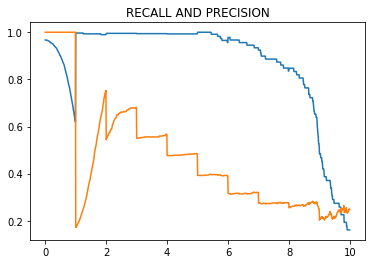

In [221]:
recall = []
precision = []
x_values = np.arange(0,10,.01)
for cutoff in x_values:
    r,p = change_cutoff(cutoff)
    recall.append(r)
    precision.append(p)
fig, ax = plt.subplots()
ax.plot(x_values, recall)
ax.plot(x_values, precision)
ax.set_title('RECALL AND PRECISION')
plt.show()

# SUPER COOL SUMMARY?

If the cutoff is set to 2, the recall is at nearly 100 (meaning I don't miss any replies) and the precision is 50% (meaning about half the people I say will reply actually reply).

At the moment, only about 10% of the ppl suggestions say will reply, so this model is potentially superior.

Suspicioulsy much so...